In [138]:
# import des librairies dont nous aurons besoin
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import my_functions
from matplotlib.cbook import boxplot_stats
from scipy import stats
from scipy.stats import shapiro 
from scipy.stats import kstest
import statsmodels.api as sm

In [139]:
# chargement et affichage des données
data = pd.read_csv('../data.csv')
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [140]:
print(data.shape)

(1338, 7)


# Détectez les erreurs
#### les valeurs manquantes 

In [141]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


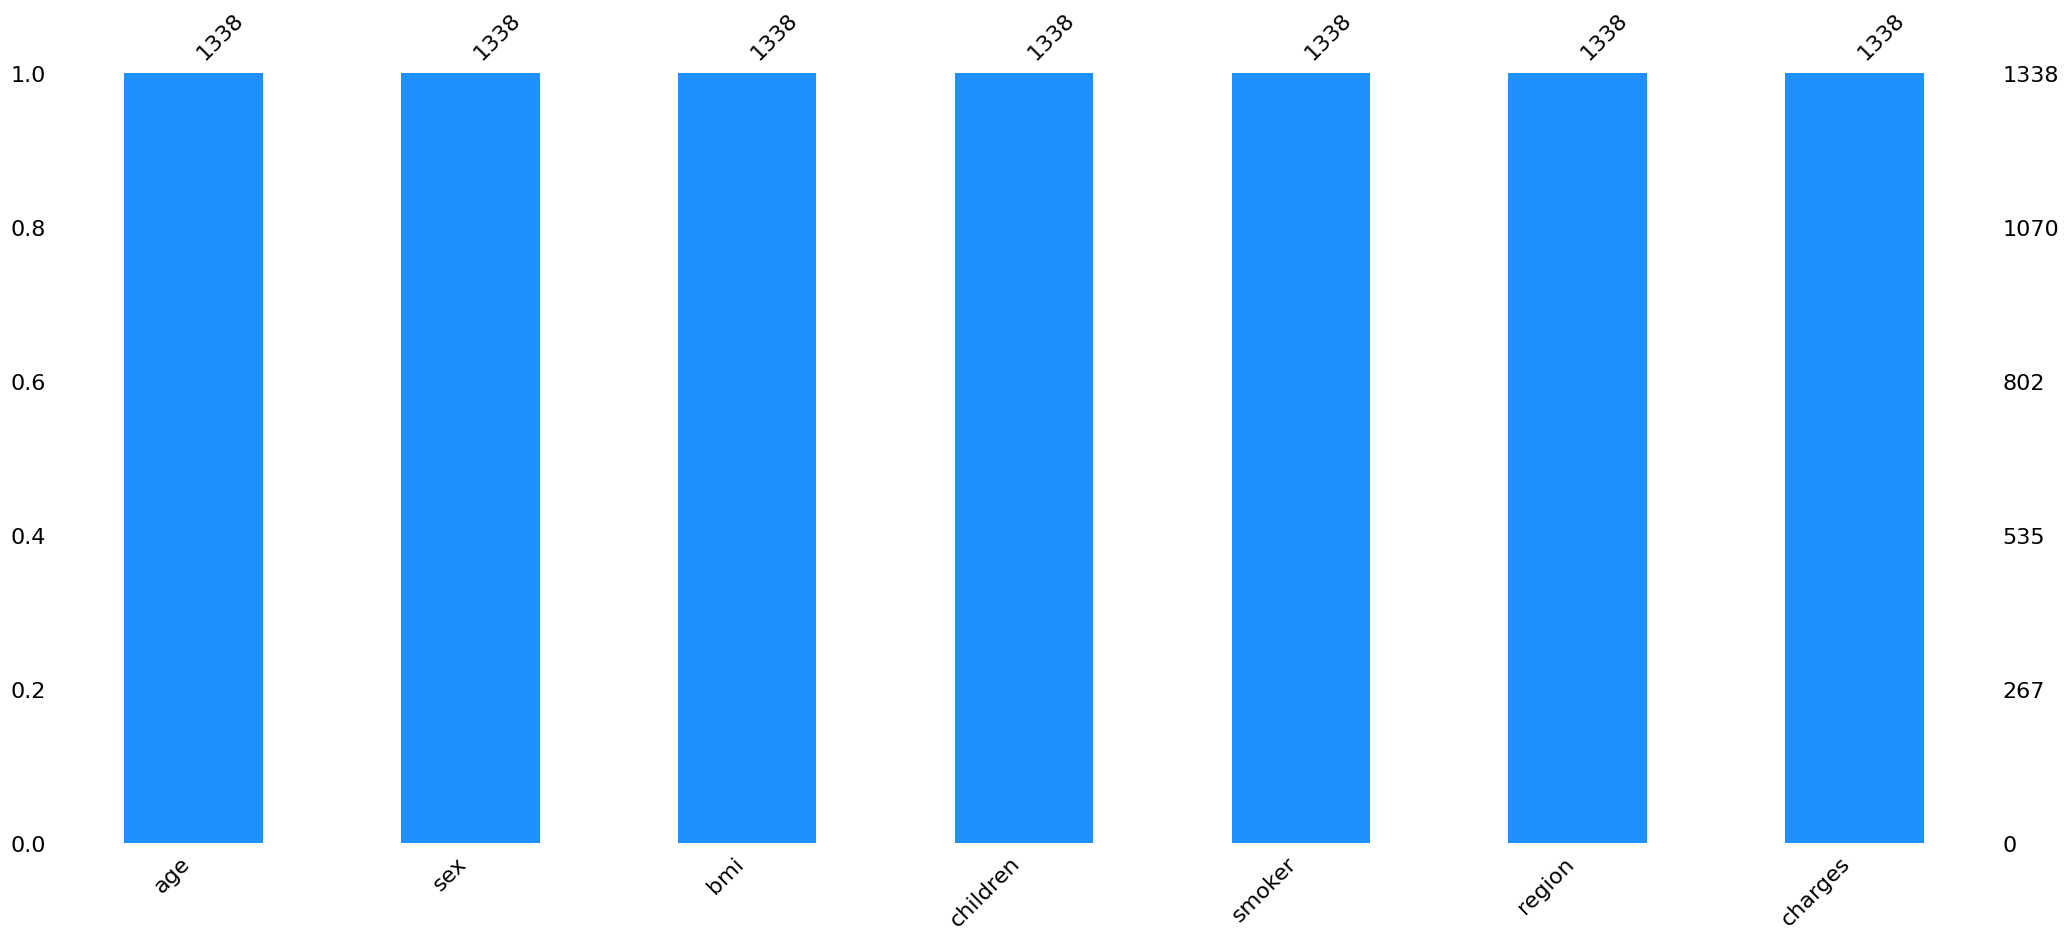

In [142]:
msno.bar(data,  color="dodgerblue");

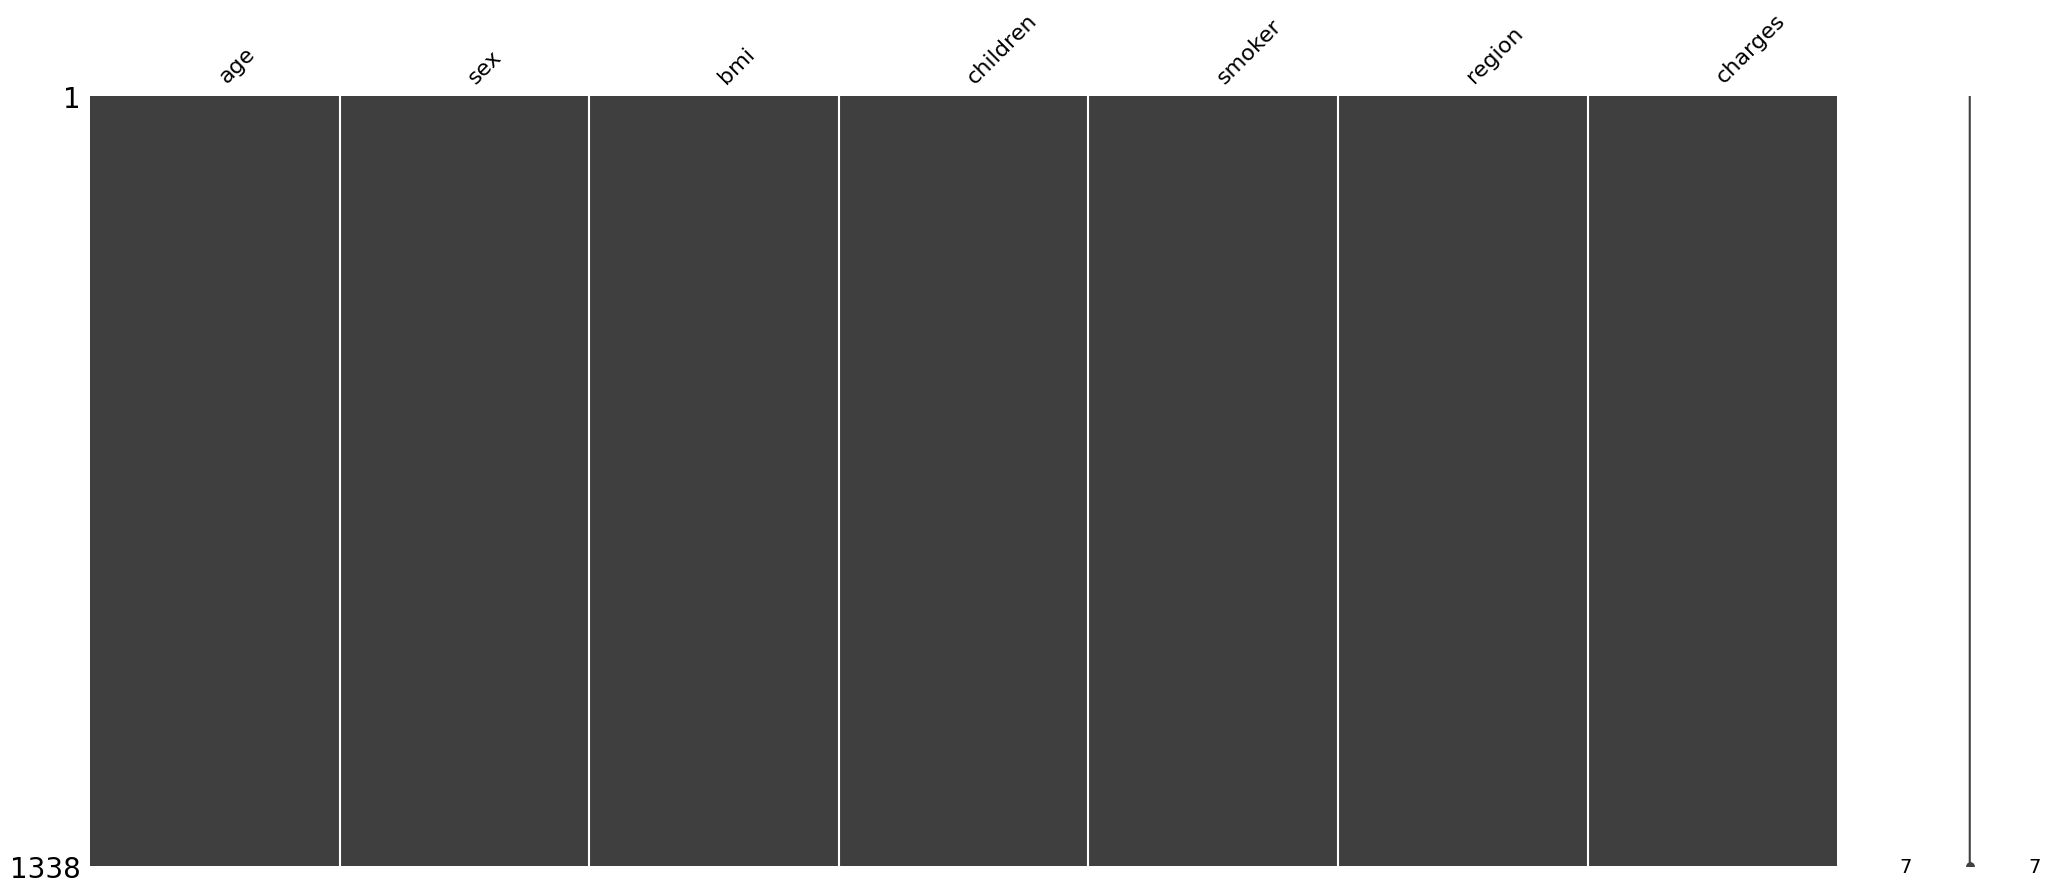

In [143]:
msno.matrix(data);

In [144]:
# data.isnul().any()

#### les doublons 

In [169]:
s = data.duplicated()
data = data.assign(duplicated=s)
def classify_bmi(row):
    if row["bmi"] < 25:
        return "normal"
    elif row["bmi"] < 30:
        return "overweight"
    else:
        return "obese"

data["bmi_class"] = data.apply(classify_bmi, axis=1)
data

,age,sex,bmi,children,smoker,region,charges,duplicated,bmi_class
0,19,female,27.900,0,yes,southwest,16884.92400,False,overweight
1,18,male,33.770,1,no,southeast,1725.55230,False,obese
2,28,male,33.000,3,no,southeast,4449.46200,False,obese
3,33,male,22.705,0,no,northwest,21984.47061,False,normal
4,32,male,28.880,0,no,northwest,3866.85520,False,overweight
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,False,obese
1334,18,female,31.920,0,no,northeast,2205.98080,False,obese
1335,18,female,36.850,0,no,southeast,1629.83350,False,obese
1336,21,female,25.800,0,no,southwest,2007.94500,False,overweight


In [146]:
data['duplicated'].unique()

array([False,  True])

In [147]:
duplicate_rows = data[data["duplicated"] == True]
print(duplicate_rows)

     age   sex    bmi  children smoker     region    charges  duplicated
581   19  male  30.59         0     no  northwest  1639.5631        True


In [148]:
data.loc[data['charges'].duplicated(keep=False),:]

,age,sex,bmi,children,smoker,region,charges,duplicated
195,19,male,30.59,0,no,northwest,1639.5631,False
581,19,male,30.59,0,no,northwest,1639.5631,True


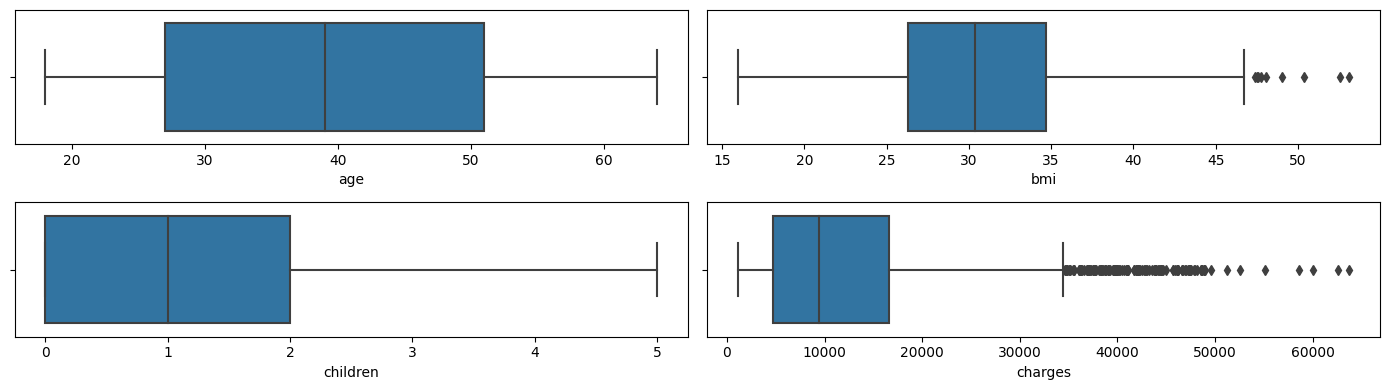

Variable age has no outliers
Variable bmi has 9 outliers
Variable children has no outliers
Variable charges has 139 outliers
--------------------------------------------------
Outilers in variable bmi : [49.06, 48.07, 47.52, 47.41, 50.38, 47.6, 52.58, 47.74, 53.13]


In [173]:
my_functions.boxplot_all_numeric_columns(data)
my_functions.get_outliers_length(data)
print("-"*50)

print(f"Outilers in variable bmi : {my_functions.get_outliers_by_column(data['bmi'])}")

# Analyse univariée de chaque variable. Si les distributions ne sont pas normales, appliquer une transformation logarithmique.

<AxesSubplot:xlabel='sex', ylabel='count'>

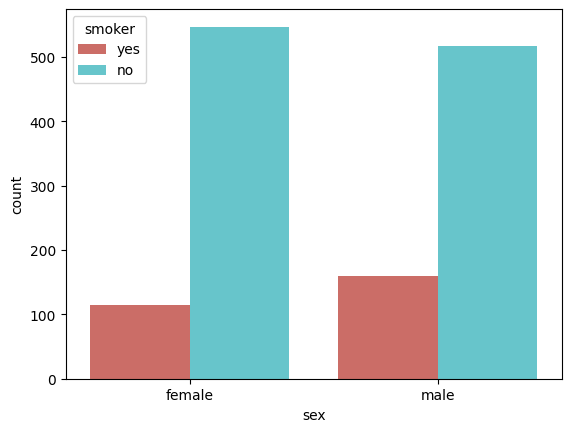

In [151]:
sns.countplot(x='sex', data = data, hue = 'smoker', palette= 'hls')

<AxesSubplot:xlabel='sex', ylabel='charges'>

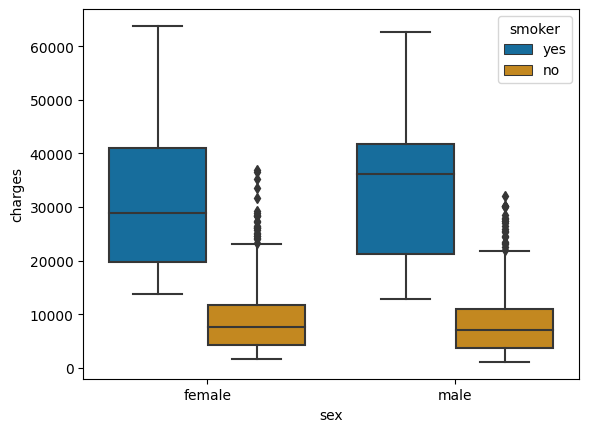

In [152]:
sns.boxplot(x='sex', y= 'charges', data = data, hue = 'smoker',
                     palette= 'colorblind')

<AxesSubplot:xlabel='sex', ylabel='charges'>

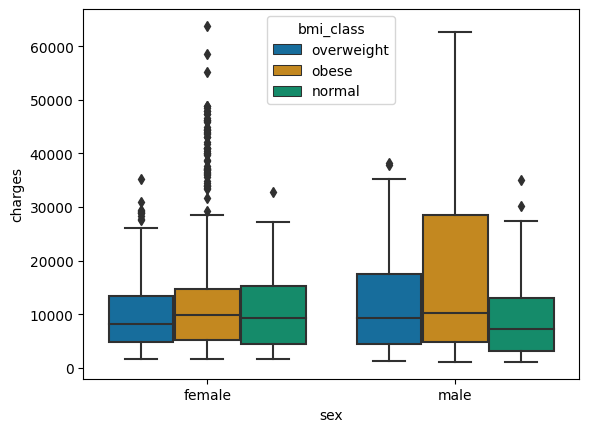

In [153]:
sns.boxplot(x='sex', y= 'charges', data = data, hue = 'bmi_class',
                     palette= 'colorblind')

<AxesSubplot:xlabel='region', ylabel='charges'>

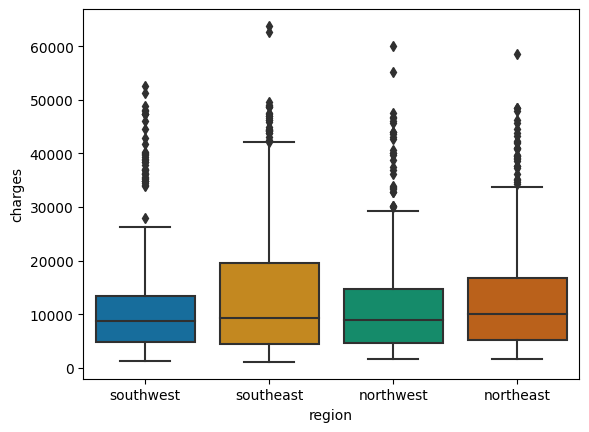

In [154]:
sns.boxplot(x='region', y= 'charges', data = data,
                     palette= 'colorblind')

<AxesSubplot:xlabel='region', ylabel='charges'>

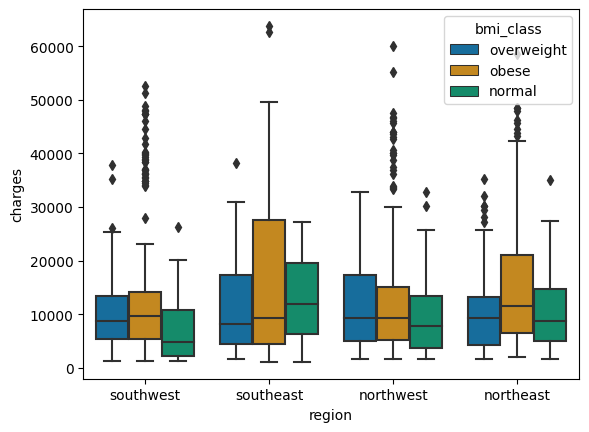

In [155]:
sns.boxplot(x='region', y= 'charges', data = data, hue = 'bmi_class',
                     palette= 'colorblind')

<AxesSubplot:xlabel='charges', ylabel='Count'>

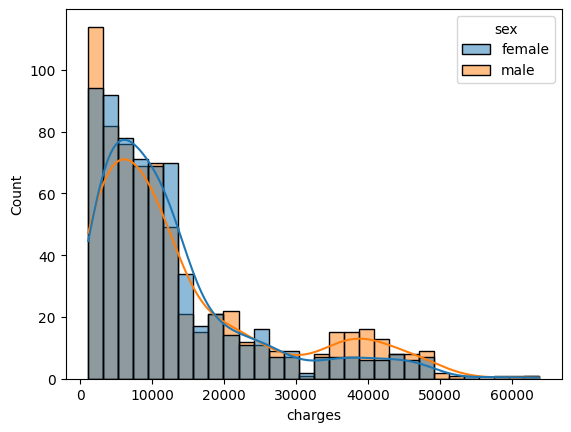

In [156]:
sns.histplot(x = 'charges', data = data, hue = 'sex', kde = True)


In [157]:
# fig, ax = plt.subplots(1,2,figsize=(10,7))
# plt.sca(ax[0])
# sns.histplot(x= 'charges', data = data[data['smoker']=='No'],
#                          bins = 25, color = 'red')
# plt.title("Smoker = No")

# plt.sca(ax[1])
# sns.histplot(x= 'charges', data = data[data['smoker']=='Yes'], bins = 25)
# plt.title("Smoker = Yes")


<AxesSubplot:xlabel='age', ylabel='charges'>

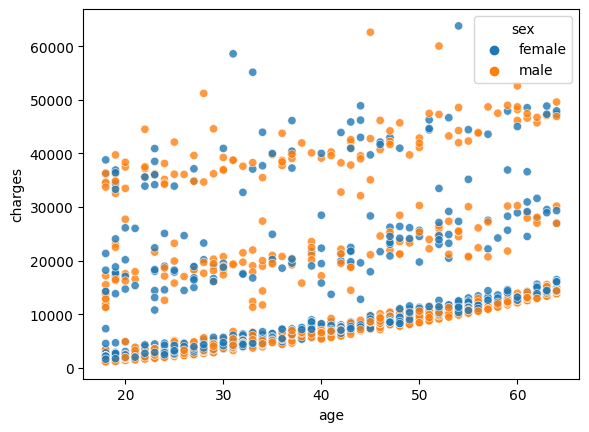

In [158]:
sns.scatterplot(x='age', y='charges', data = data,
                            alpha= 0.8, color = 'blue', hue = 'sex')

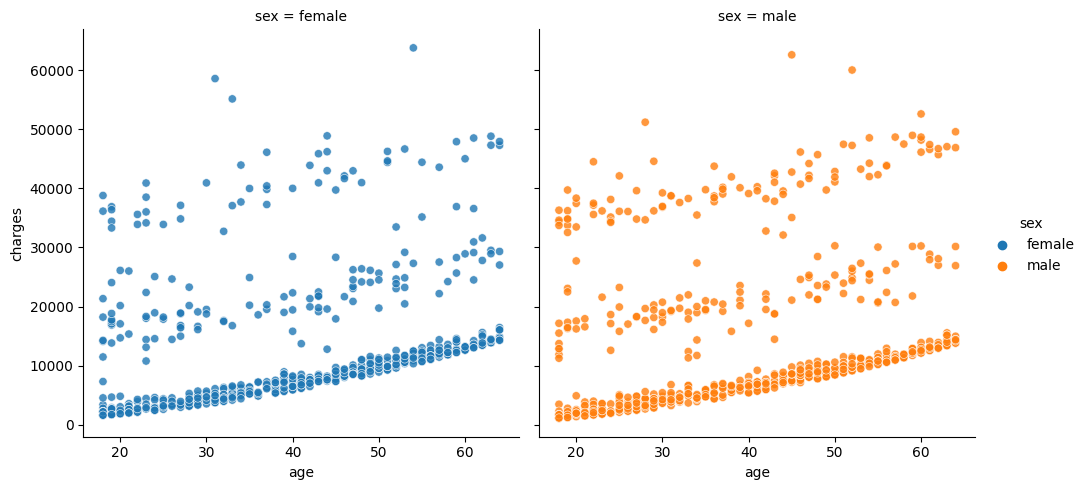

In [159]:
sns.relplot(x='age', y='charges', data = data,
            alpha= 0.8, color = 'blue', hue = 'sex',
                                kind = 'scatter', col = 'sex')

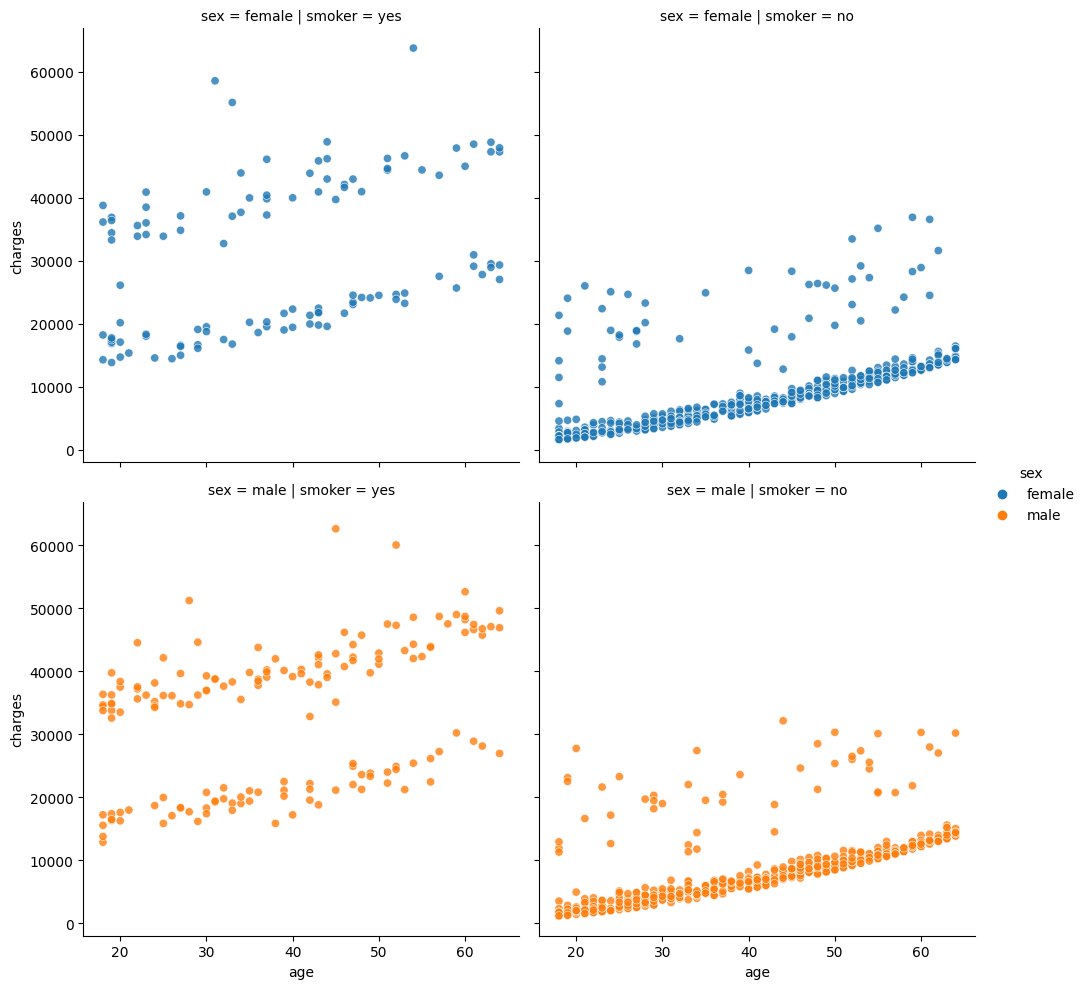

In [160]:
sns.relplot(x='age', y='charges', data = data,
            alpha= 0.8, color = 'blue', hue = 'sex',
                                kind = 'scatter', row = 'sex', col = 'smoker')

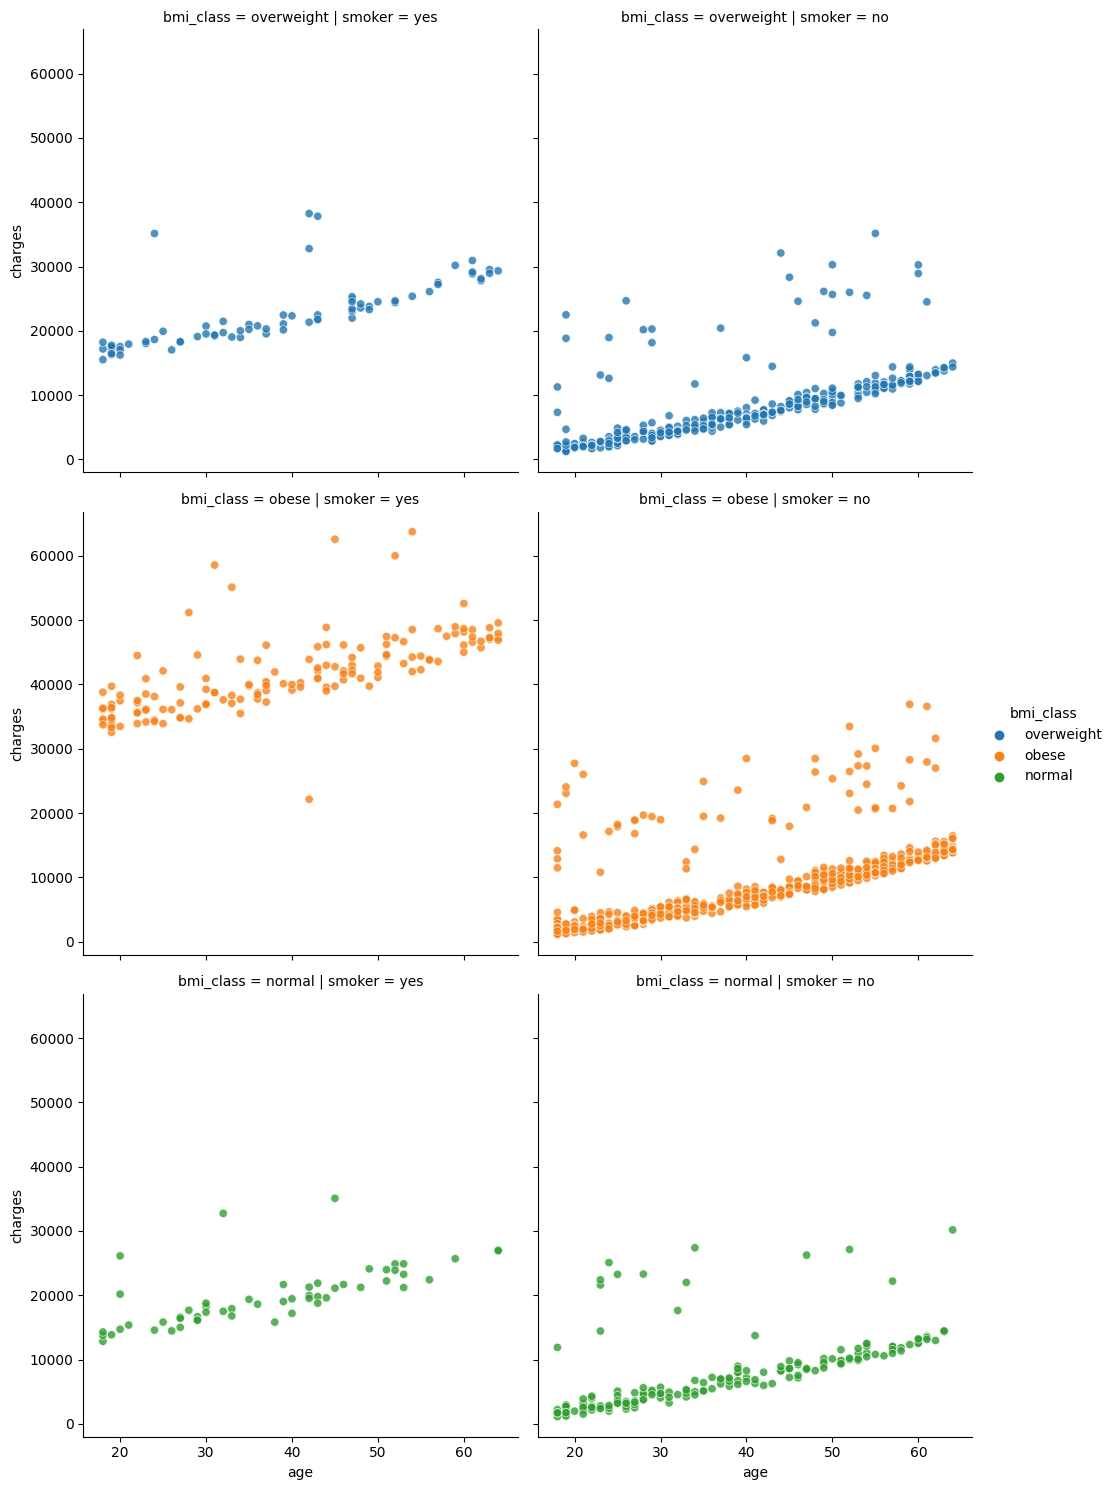

In [161]:
sns.relplot(x='age', y='charges', data = data,
            alpha= 0.8, color = 'blue', hue = 'bmi_class',
                                kind = 'scatter', row = 'bmi_class', col = 'smoker')

# Analyse univariée de chaque variable. Si les distributions ne sont pas normales, appliquer une transformation logarithmique.

In [162]:
def describe(df, stats):
    d = df.describe()
    return pd.concat([d, df.reindex(columns=d.columns).agg(stats)])

describe(data, ['mad','skew', 'kurt'])

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010
mad,12.248931,4.897871,0.985405,9091.126581
skew,0.055673,0.284047,0.938380,1.515880


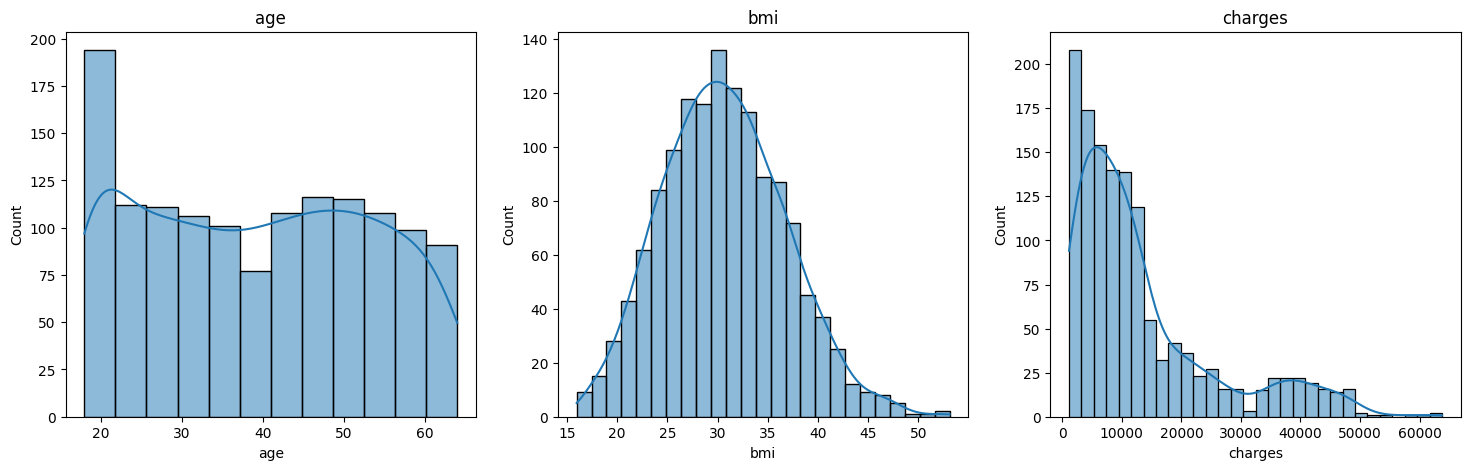

In [163]:


numeric_data = data[['age', 'bmi', 'charges']]

# Create a figure and a set of subplots
ncols = len(numeric_data.columns)

fig, ax = plt.subplots(nrows=1, ncols=ncols, figsize=(18, 5))

# Iterate over the columns of the DataFrame
for i, col in enumerate(numeric_data.columns):
    # Create a distribution plot and a histogram on each subplot
    sns.histplot(data=data, x=col, ax=ax[i], kde=True)
    ax[i].set_title(col)

plt.show()


############################# ORIGINAL DATA #############################
Agostino and Pearson's test
NormaltestResult(statistic=336.8851220567733, pvalue=7.019807901276197e-74)
Shapiro-Wilk test
ShapiroResult(statistic=0.8146880865097046, pvalue=1.1505194006561963e-36)
Kolmogorov-Smirnov test
KstestResult(statistic=1.0, pvalue=0.0)
**************************************************
#############################LOG TRANSFORMATION #############################
Agostino and Pearson's test
NormaltestResult(statistic=52.71670509113935, pvalue=3.5703676381337117e-12)
Shapiro-Wilk test
ShapiroResult(statistic=0.9831623435020447, pvalue=2.285782847721851e-11)
Kolmogorov-Smirnov test
KstestResult(statistic=0.9999999999989123, pvalue=0.0)
**************************************************
############################# SQUARE ROOT TRANSFORMATION #############################
NormaltestResult(statistic=112.4605295472106, pvalue=3.7975744156203163e-25)
Shapiro-Wilk test
ShapiroResult(statistic=0.9

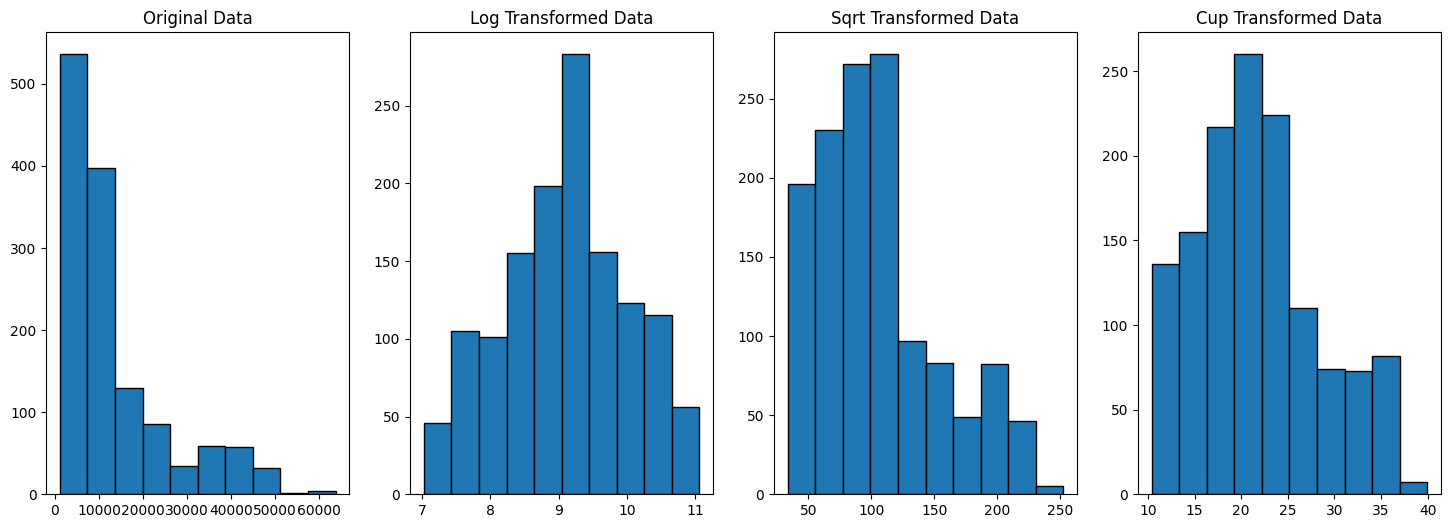

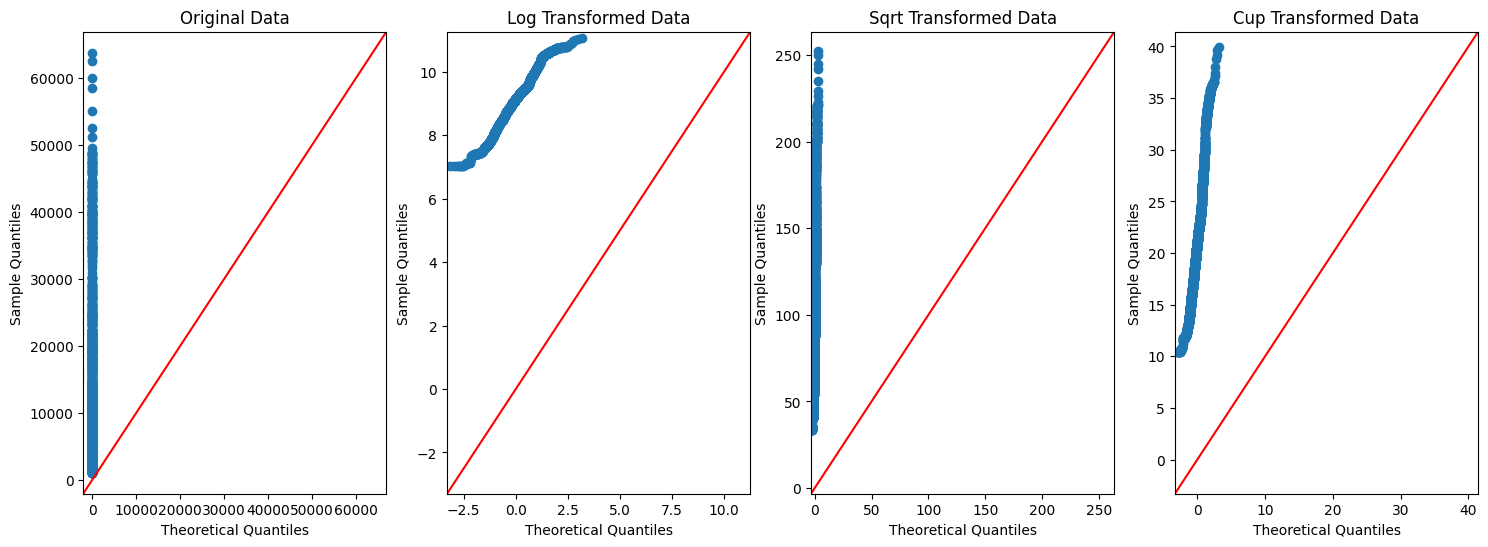

In [175]:

def normalize(column):
    print('############################# ORIGINAL DATA #############################')
    print("Agostino and Pearson's test")
    print(stats.normaltest(column))
    print("Shapiro-Wilk test")
    print(shapiro(column))
    print("Kolmogorov-Smirnov test")
    print(kstest(column, 'norm'))
    print('*'*50)

    print('#############################LOG TRANSFORMATION #############################')
    print("Agostino and Pearson's test")
    print(stats.normaltest(np.log(column)))
    print("Shapiro-Wilk test")
    print(shapiro(np.log(column)))
    print("Kolmogorov-Smirnov test")
    print(kstest(np.log(column), 'norm'))
    print('*'*50)


    print('############################# SQUARE ROOT TRANSFORMATION #############################')
    print(stats.normaltest(np.sqrt(column)))
    print("Shapiro-Wilk test")
    print(shapiro(np.sqrt(column)))
    print("Kolmogorov-Smirnov test")
    print(kstest(np.sqrt(column), 'norm'))
    print('*'*50)

    print('############################# CUBE  ROOT TRANSFORMATION #############################')
    print(stats.normaltest(np.cbrt(column)))
    print("Shapiro-Wilk test")
    print(shapiro(np.cbrt(column)))
    print("Kolmogorov-Smirnov test")
    print(kstest(np.cbrt(column), 'norm'))
    print('*'*50)

    fig, axs = plt.subplots(nrows=1, ncols=4, figsize = (18,6))
    #add title to each histogram
    axs[0].set_title('Original Data')
    axs[1].set_title('Log Transformed Data')
    axs[2].set_title('Sqrt Transformed Data')
    axs[3].set_title('Cup Transformed Data')
    #create histograms
    axs[0].hist(column, edgecolor='black')
    axs[1].hist(np.log(column), edgecolor='black')
    axs[2].hist(np.sqrt(column), edgecolor='black')
    axs[3].hist(np.cbrt(column), edgecolor='black')


    fig, axs = plt.subplots(nrows=1, ncols=4, figsize = (18,6))
    # Create a QQ plot on the first subplot
    sm.qqplot(column, line='45', ax=axs[0])
    sm.qqplot(np.log(column), line='45', ax=axs[1])
    sm.qqplot(np.sqrt(column), line='45', ax=axs[2])
    sm.qqplot(np.cbrt(column), line='45', ax=axs[3])

        #add title to each histogram
    axs[0].set_title('Original Data')
    axs[1].set_title('Log Transformed Data')
    axs[2].set_title('Sqrt Transformed Data')
    axs[3].set_title('Cup Transformed Data')

normalize(data['charges'])


############################# ORIGINAL DATA #############################
Agostino and Pearson's test
NormaltestResult(statistic=1557.8205812363667, pvalue=0.0)
Shapiro-Wilk test
ShapiroResult(statistic=0.9446989893913269, pvalue=5.687060076887153e-22)
Kolmogorov-Smirnov test
KstestResult(statistic=1.0, pvalue=0.0)
**************************************************
#############################LOG TRANSFORMATION #############################
Agostino and Pearson's test
NormaltestResult(statistic=593.2823849198563, pvalue=1.4803588673227106e-129)
Shapiro-Wilk test
ShapiroResult(statistic=0.9303432703018188, pvalue=1.801949606294307e-24)
Kolmogorov-Smirnov test
KstestResult(statistic=0.9980760675452758, pvalue=0.0)
**************************************************
############################# SQUARE ROOT TRANSFORMATION #############################
NormaltestResult(statistic=1349.018679473835, pvalue=1.159620168254657e-293)
Shapiro-Wilk test
ShapiroResult(statistic=0.9424139857292175, 

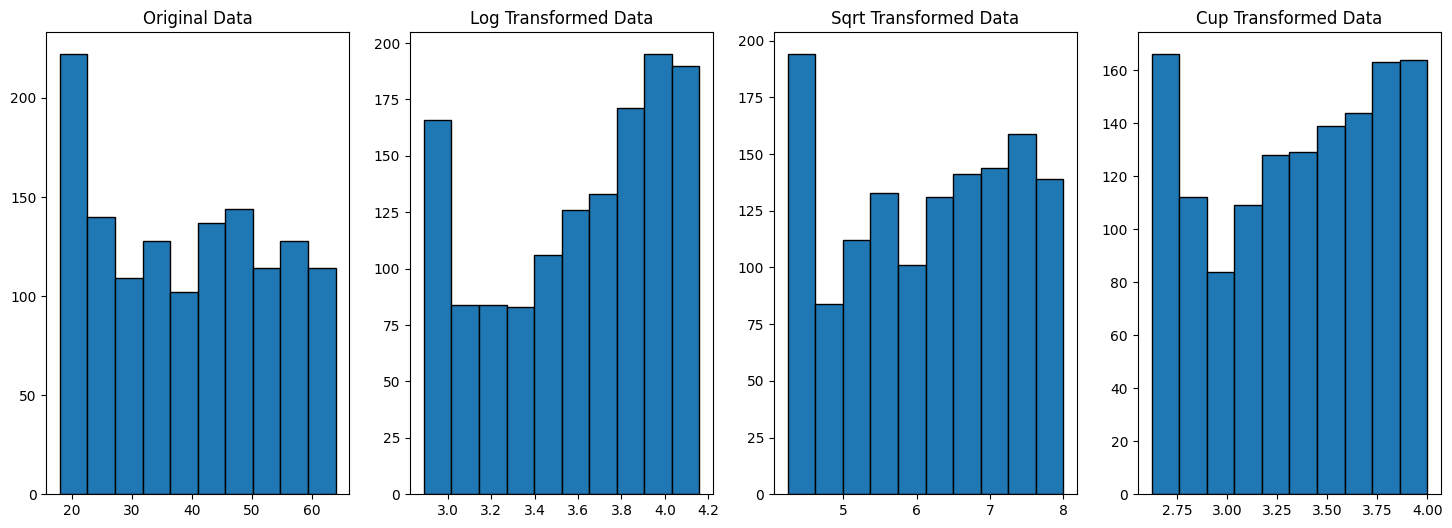

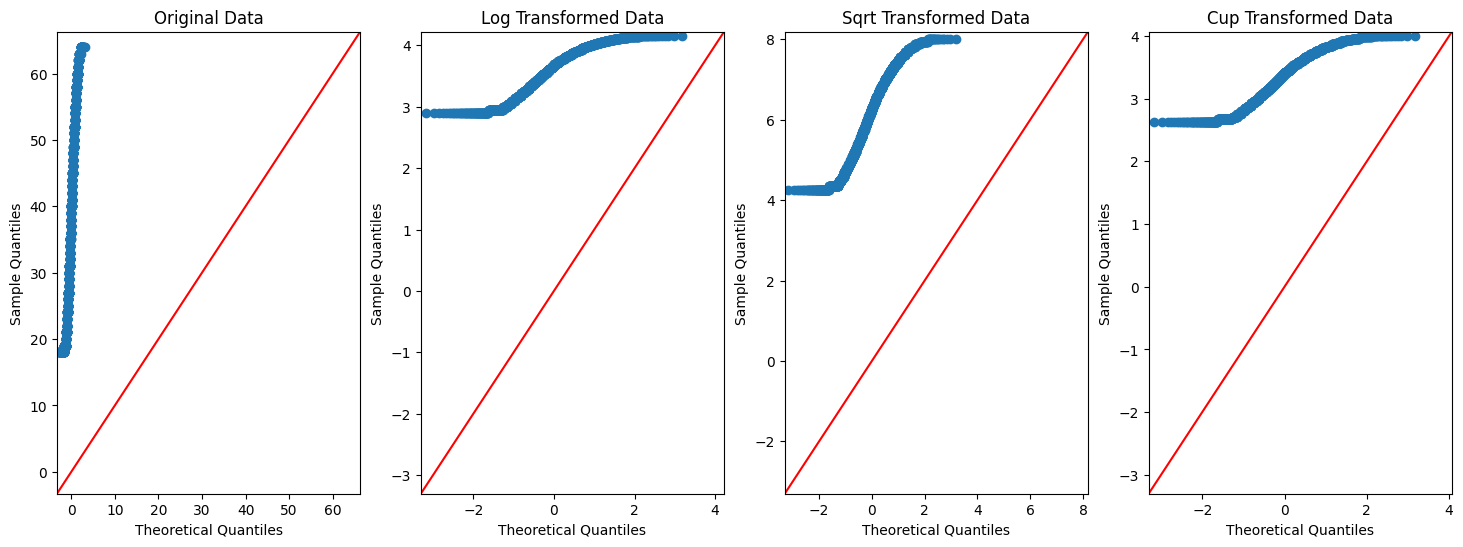

In [176]:
normalize(data['age'])

############################# ORIGINAL DATA #############################
Agostino and Pearson's test
NormaltestResult(statistic=17.581447872784118, pvalue=0.0001521377897266011)
Shapiro-Wilk test
ShapiroResult(statistic=0.9938861727714539, pvalue=2.6033414542325772e-05)
Kolmogorov-Smirnov test
KstestResult(statistic=1.0, pvalue=0.0)
**************************************************
#############################LOG TRANSFORMATION #############################
Agostino and Pearson's test
NormaltestResult(statistic=15.3996136104345, pvalue=0.000452914675187274)
Shapiro-Wilk test
ShapiroResult(statistic=0.9945858120918274, pvalue=9.139721078099683e-05)
Kolmogorov-Smirnov test
KstestResult(statistic=0.9971979218164476, pvalue=0.0)
**************************************************
############################# SQUARE ROOT TRANSFORMATION #############################
NormaltestResult(statistic=2.8510429844674228, pvalue=0.2403830726105903)
Shapiro-Wilk test
ShapiroResult(statistic=0.998575

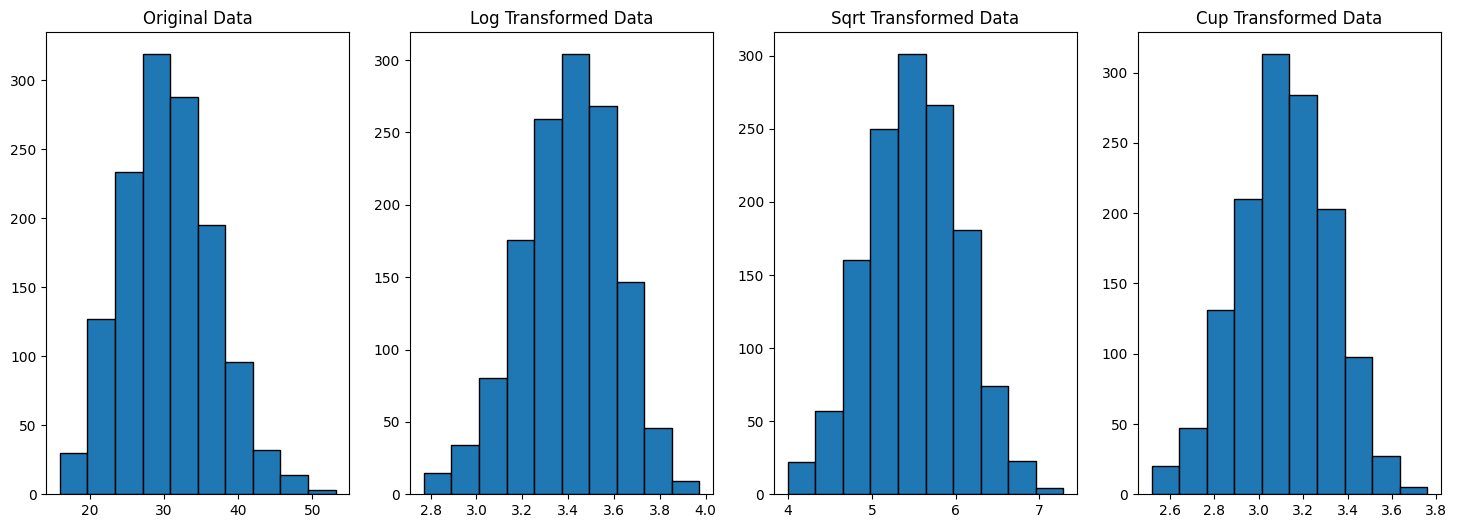

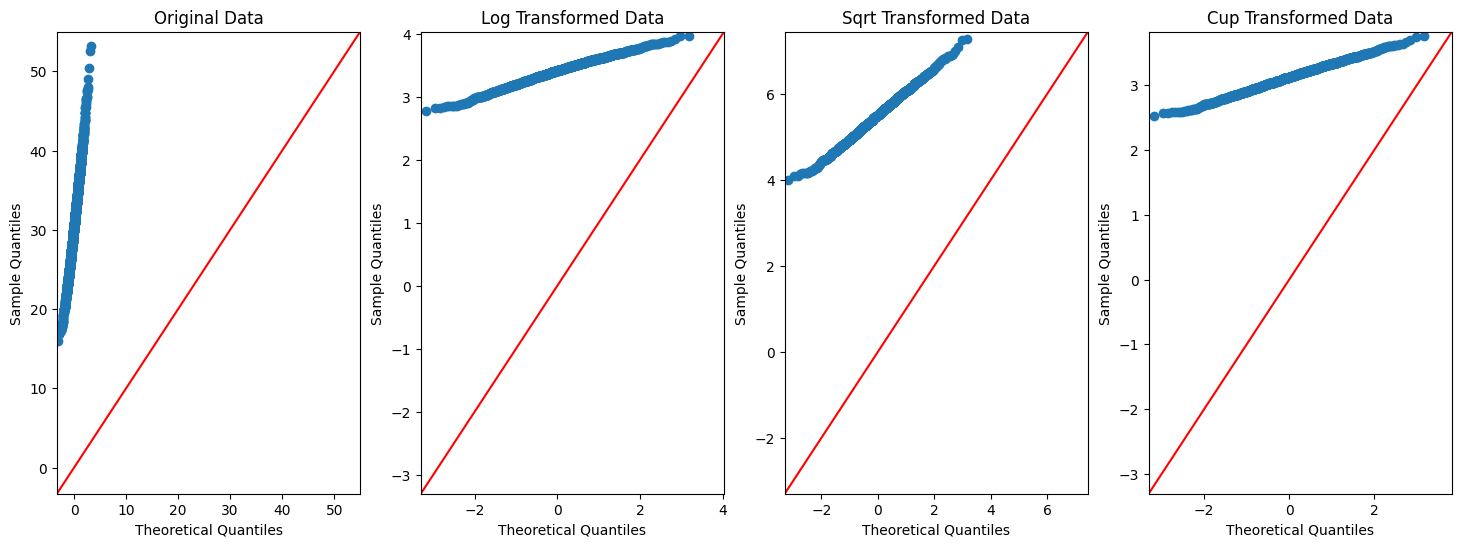

In [177]:
normalize(data['bmi'])

### Les variables qualitatives

In [188]:
def frequency_table(data, column):
    effectifs = data[column].value_counts()
    modalites = effectifs.index # l'index de effectifs contient les modalités

    tab = pd.DataFrame(modalites, columns = [column]) # création du tableau à partir des modalités
    tab["n"] = effectifs.values
    tab["f"] = tab["n"] / len(data) # len(data) renvoie la taille de l'échantillon
    tab = tab.sort_values(column) # tri des valeurs de la variable X (croissant)
    tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée
    display(tab)

print("-"*20 + " Frequency table " + "-"*20)
frequency_table(data, column= 'bmi_class')
frequency_table(data, column= 'region')
frequency_table(data, column= 'sex')


-------------------- Frequency table --------------------


,bmi_class,n,f,F
2,normal,245,0.183109,0.183109
0,obese,707,0.528401,0.711510
1,overweight,386,0.288490,1.000000


,region,n,f,F
3,northeast,324,0.242152,0.242152
2,northwest,325,0.242900,0.485052
0,southeast,364,0.272048,0.757100
1,southwest,325,0.242900,1.000000


,sex,n,f,F
1,female,662,0.494768,0.494768
0,male,676,0.505232,1.000000


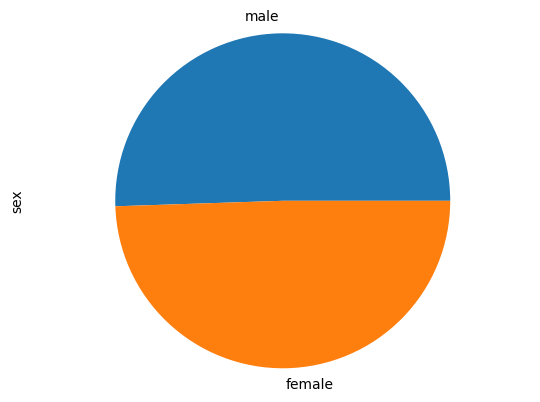

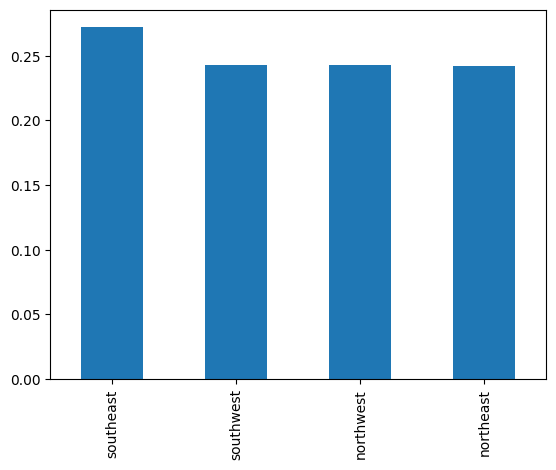

In [191]:
# Diagramme en secteurs
data["sex"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
data["region"].value_counts(normalize=True).plot(kind='bar')
plt.show()

# Mesures de concentration 
## sont le plus souvent utilisées pour des sommes d'argent ! Étudier la concentration d'argent, c'est regarder si l'argent est réparti de manière égalitaire ou pas.

Ce que l'on va regarder, c'est si tout l'argent que vous dépensez se concentre en quelques opérations bancaires, ou si au contraire, il est bien réparti parmi les opérations. Dire que votre argent se concentre sur quelques opérations signifie que généralement, vous faites de très nombreuses petites dépenses, et que parfois, il vous arrive de faire quelques dépenses énormes.

Au contraire, l'argent que vous dépensez est bien réparti si toutes vos opérations bancaires (sortantes) ont à peu près le même montant.

Pour visualiser cela, nous utilisons la `courbe de Lorenz`

#### l'indice de Gini
La courbe de Lorenz n'est pas une statistique, c'est une courbe ! Du coup, on a créé l'indice de Gini, qui résume la courbe de Lorenz.

Il mesure l'aire présente entre la première bissectrice et la courbe de Lorenz. Plus précisément, si on note S cette aire, alors :

gini=2 × S


L'indice de Gini est un indicateur statistique utilisé pour mesurer l'égalité dans une société ou une distribution. Plus précisément, l'indice de Gini mesure la dispersion des valeurs autour de la médiane d'une distribution, en utilisant une échelle de 0 à 1, où 0 représente une distribution parfaite de l'égalité (c'est-à-dire une situation où chaque individu dans la distribution a la même valeur) et 1 représente une distribution parfaite de l'inégalité (c'est-à-dire une situation où un seul individu dans la distribution a toutes les valeurs et tous les autres n'ont aucune valeur).

L'indice de Gini est souvent utilisé pour mesurer l'inégalité des revenus dans une économie, mais il peut également être utilisé pour mesurer l'inégalité dans d'autres domaines, tels que la distribution de la richesse, la distribution de la santé ou la distribution de l'accès à l'éducation.


On va utiliser l'indice de Gini pour mesurer l'inégalité dans la distribution des assurances. Par exemple, si vous souhaitez savoir si les personnes d'une certaine région ont un accès égal aux assurances de qualité et à des tarifs abordables, vous pouvez utiliser l'indice de Gini pour mesurer l'inégalité dans la distribution de l'accès aux assurances dans cette région. Si l'indice de Gini est élevé, cela indique qu'il y a une forte inégalité dans l'accès aux assurances dans cette région, ce qui pourrait être dû à des facteurs tels que la santé, le revenu, l'emplacement géographique ou d'autres facteurs.

Il est important de noter que l'indice de Gini ne mesure que la dispersion des valeurs autour de la médiane, il ne tient pas compte de la façon dont la distribution est répartie au-dessus ou en dessous de la médiane. Par conséquent, il peut être utile de combiner l'indice de Gini avec d'autres indicateurs pour avoir une image complète de l'inégalité dans la distribution des assurances.

gini coefiicient : 0.4631250807925965


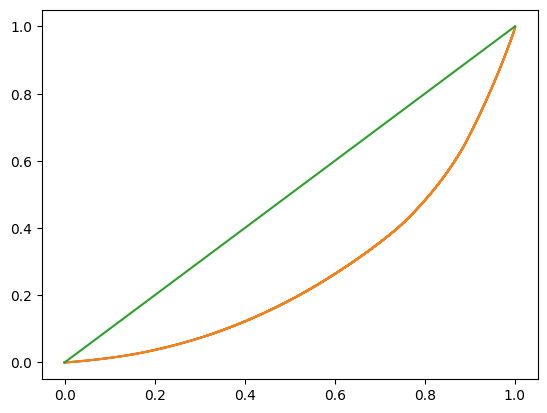

In [164]:
dep = data['charges']
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')

xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1]) #tracer la bisséctrice

# plt.show()
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
# another methode : 
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))
print(f"gini coefiicient : {gini(dep)}")